In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [372]:
# data_sample = data.sample(frac=0.05, replace=False, random_state=1)
# data_sample.to_csv("modified_adult_train_sample.csv",index = None)

In [373]:
data = pd.read_csv("modified_adult_train.csv")
its = pd.read_csv("results/its.csv")
fds = pd.read_csv("results/fd_loss.csv")
mean_loss = pd.read_csv("results/mean_loss.csv")
origin_loss = pd.read_csv("results/origin_loss.csv")

its_sample = pd.read_csv("results/its_sample.csv")
fds_sample = pd.read_csv("results/fd_loss_sample.csv")
mean_loss_sample = pd.read_csv("results/mean_loss_sample.csv")
origin_loss_sample = pd.read_csv("results/origin_loss_sample.csv")



In [374]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,4500,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3500,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,6500,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,7000,0,40,United-States,<=50K
4,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,7000,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,4500,0,40,United-States,<=50K
30144,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,6500,0,36,United-States,<=50K
30145,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,6500,0,50,United-States,<=50K
30146,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,6500,0,40,United-States,<=50K


In [375]:
def plot_pdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)

    plt.plot(bins_count[1:], pdf, label=label)

def plot_cdf(data,label,bin=10):
    count, bins_count = np.histogram(data, bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label=label)

def make_compare_plot(datasets,col_name, function, names, title):
    for i in range(len(datasets)):
        data = datasets[i]
        function(data[col_name],names[i])
    plt.title(title)
    plt.legend()
    plt.show()

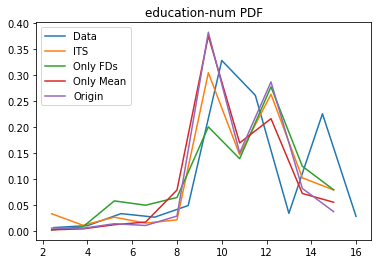

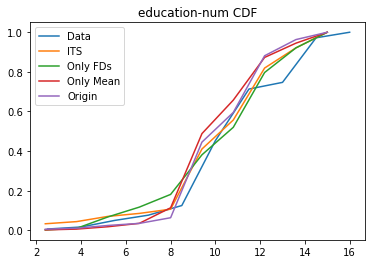

In [376]:
make_compare_plot([data,its,fds,mean_loss,origin_loss],"education-num",plot_pdf,["Data","ITS","Only FDs", "Only Mean","Origin"],"education-num PDF")
make_compare_plot([data,its,fds,mean_loss,origin_loss],"education-num",plot_cdf,["Data","ITS","Only FDs", "Only Mean","Origin"],"education-num CDF")

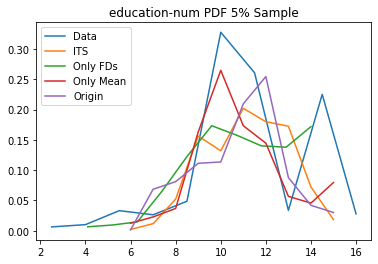

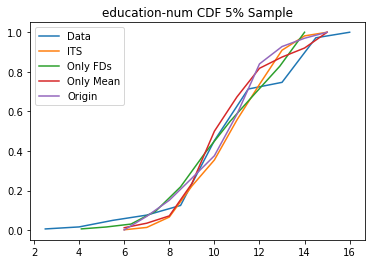

In [377]:
make_compare_plot([data,its_sample,fds_sample,mean_loss_sample,origin_loss_sample],"education-num",plot_pdf,["Data","ITS","Only FDs", "Only Mean","Origin"],"education-num PDF 5% Sample")
make_compare_plot([data,its_sample,fds_sample,mean_loss_sample,origin_loss_sample],"education-num",plot_cdf,["Data","ITS","Only FDs", "Only Mean","Origin"],"education-num CDF 5% Sample")

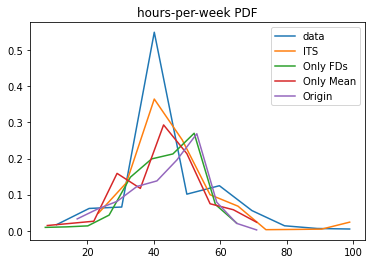

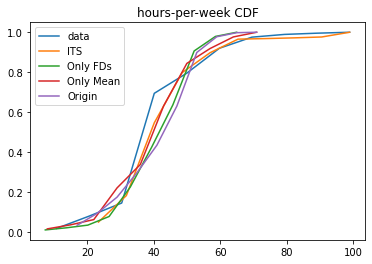

In [378]:
make_compare_plot([data,its,fds,mean_loss,origin_loss],"hours-per-week",plot_pdf,["data","ITS","Only FDs", "Only Mean","Origin"],"hours-per-week PDF")
make_compare_plot([data,its,fds,mean_loss,origin_loss],"hours-per-week",plot_cdf,["data","ITS","Only FDs", "Only Mean","Origin"],"hours-per-week CDF")

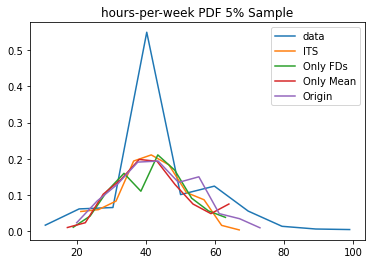

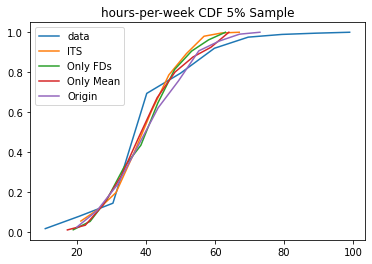

In [379]:
make_compare_plot([data,its_sample,fds_sample,mean_loss_sample,origin_loss_sample],"hours-per-week",plot_pdf,["data","ITS","Only FDs", "Only Mean","Origin"],"hours-per-week PDF 5% Sample")
make_compare_plot([data,its_sample,fds_sample,mean_loss_sample,origin_loss_sample],"hours-per-week",plot_cdf,["data","ITS","Only FDs", "Only Mean","Origin"],"hours-per-week CDF 5% Sample")

In [380]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [381]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

## Machine Learning Performance

In [382]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,4500,0,40,United-States,<=50K
1,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,3500,0,40,United-States,<=50K
2,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,6500,0,40,Cuba,<=50K
3,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,7000,0,40,United-States,<=50K
4,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,7000,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,4500,0,40,United-States,<=50K
30144,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,6500,0,36,United-States,<=50K
30145,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,6500,0,50,United-States,<=50K
30146,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,6500,0,40,United-States,<=50K


In [383]:
def convert_type(data,columns):
    data = data[columns].astype('category')
    for col in columns:
        data[col] = data[col].cat.codes
    return data

In [384]:
data["label"] = "data"
its["label"] = "its"
fds["label"] = "fds"
mean_loss["label"] = "mean_loss"
origin_loss["label"] = "origin_loss"

its_sample["label"] = "its_sample"
fds_sample["label"] = "fds_sample"
mean_loss_sample["label"] = "mean_loss_sample"
origin_loss_sample["label"] = "origin_loss_sample"

full = pd.concat([data,its,fds,mean_loss,origin_loss,its_sample,fds_sample,mean_loss_sample,origin_loss_sample])

In [385]:
full[['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income']] = convert_type(full,['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income'])

In [386]:
data = full[full["label"] == "data"]
its = full[full["label"] == "its"]
fds = full[full["label"] == "fds"]
mean_loss = full[full["label"] == "mean_loss"]
origin_loss = full[full["label"] == "origin_loss"]

its_sample = full[full["label"] == "its_sample"]
fds_sample = full[full["label"] == "fds_sample"]
mean_loss_sample = full[full["label"] == "mean_loss_sample"]
origin_loss_sample = full[full["label"] == "origin_loss_sample"]

In [387]:
import numpy
from sklearn.model_selection import cross_val_score
# x is your dataset
origin_np = np.array(data)
col = list(data.columns)
indices = numpy.random.permutation(data.shape[0])
n = data.shape[0] - fds.shape[0]
test_idx, training_idx = indices[:n], indices[n:]
training_data, test = pd.DataFrame(origin_np[training_idx,:],columns = col), pd.DataFrame(origin_np[test_idx,:],columns = col)


In [388]:
training_data['income'].value_counts()

0    20343
1     6790
Name: income, dtype: int64

In [389]:
train_data_y = training_data["income"].astype("float64")
train_data_X = training_data.drop(columns=['income',"label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=['income',"label","fnlwgt"]).astype("float64")
test_data_y = test["income"].astype("float64")


# origin GAN Loss
train_origin_X = origin_loss.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_origin_y = origin_loss["income"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_its_y = its["income"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_fds_y = fds["income"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["income"].astype("float64")


### Predict Income

In [390]:
train_origin_X_sample = origin_loss_sample.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_origin_y_sample = origin_loss_sample["income"].astype("float64")

# origin ITS Loss
train_its_X_sample = its_sample.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_its_y_sample = its_sample["income"].astype("float64")


# origin FDS Loss
train_fds_X_sample = fds_sample.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_fds_y_sample = fds_sample["income"].astype("float64")


# origin Means Loss
train_means_X_sample = mean_loss_sample.drop(columns=['income',"label","fnlwgt"]).astype("float64")
train_means_y_sample = mean_loss_sample["income"].astype("float64")

In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

print("Predict Income(2 classes) using Decision Tree Classifier\n")

clf = DecisionTreeClassifier(max_depth = 5, random_state=1)

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",cross_val_score(clf, test_data_X,test_data_y, cv=3).mean())


print("+++")

clf.fit(train_origin_X, train_origin_y)
print("Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X_sample, train_origin_y_sample)
print("5% Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X_sample, train_its_y_sample)
print("5% ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X_sample, train_fds_y_sample)
print("5% FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X_sample, train_means_y_sample)
print("5% Mean Loss Score:",clf.score(test_data_X,test_data_y))

Predict Income(2 classes) using Decision Tree Classifier

Origin Data Score: 0.8169154228855721
+++
Origin GAN Loss Score: 0.8003316749585406
ITS-GAN Score: 0.7436152570480928
FDs Loss Score: 0.7903814262023218
Mean Loss Score: 0.7379767827529021
+++
5% Origin GAN Loss Score: 0.7459369817578773
5% ITS-GAN Score: 0.739966832504146
5% FDs Loss Score: 0.7266998341625207
5% Mean Loss Score: 0.6805970149253732


In [392]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth = 3,random_state=1)

print("Predict Income(2 classes) using Random Forest Classifier\n")

clf.fit(train_data_X, train_data_y)
print("Origin Data Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X, train_origin_y)
print("Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X_sample, train_origin_y_sample)
print("5% Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X_sample, train_its_y_sample)
print("5% ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X_sample, train_fds_y_sample)
print("5% FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X_sample, train_means_y_sample)
print("5% Mean Loss Score:",clf.score(test_data_X,test_data_y))

Predict Income(2 classes) using Random Forest Classifier

Origin Data Score: 0.8175787728026535
+++
Origin GAN Loss Score: 0.7737976782752902
ITS-GAN Score: 0.8009950248756219
FDs Loss Score: 0.8076285240464345
Mean Loss Score: 0.7903814262023218
+++
5% Origin GAN Loss Score: 0.8036484245439469
5% ITS-GAN Score: 0.7844112769485904
5% FDs Loss Score: 0.7582089552238805
5% Mean Loss Score: 0.8016583747927032


### Predict Workclass

In [393]:
train_data_y = training_data["workclass"].astype("float64")
train_data_X = training_data.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
test_data_y = test["workclass"].astype("float64")


# origin GAN Loss
train_origin_X = origin_loss.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_origin_y = origin_loss["workclass"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_its_y = its["workclass"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_fds_y = fds["workclass"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["workclass"].astype("float64")

###########

# origin GAN Loss
train_origin_X_sample = origin_loss_sample.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_origin_y_sample = origin_loss_sample["workclass"].astype("float64")

# origin ITS Loss
train_its_X_sample = its_sample.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_its_y_sample = its_sample["workclass"].astype("float64")


# origin FDS Loss
train_fds_X_sample = fds_sample.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_fds_y_sample = fds_sample["workclass"].astype("float64")


# origin Means Loss
train_means_X_sample = mean_loss_sample.drop(columns=['workclass',"label","fnlwgt"]).astype("float64")
train_means_y_sample = mean_loss_sample["workclass"].astype("float64")

In [394]:
clf = DecisionTreeClassifier(max_depth = 5, random_state=1)

print("Predict workclass(6 classes) using Decision Tree Classifier\n")

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X, train_origin_y)
print("Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X_sample, train_origin_y_sample)
print("5% Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X_sample, train_its_y_sample)
print("5% ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X_sample, train_fds_y_sample)
print("5% FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X_sample, train_means_y_sample)
print("5% Mean Loss Score:",clf.score(test_data_X,test_data_y))

Predict workclass(6 classes) using Decision Tree Classifier

Origin Data Score: 0.7346600331674958
+++
Origin GAN Loss Score: 0.597346600331675
ITS-GAN Score: 0.6885572139303483
FDs Loss Score: 0.5240464344941956
Mean Loss Score: 0.6328358208955224
+++
5% Origin GAN Loss Score: 0.2620232172470978
5% ITS-GAN Score: 0.5585406301824213
5% FDs Loss Score: 0.536318407960199
5% Mean Loss Score: 0.1330016583747927


In [395]:
clf = RandomForestClassifier(max_depth = 5,random_state=0)
print("Predict workclass(6 classes) using Random Forest Classifier\n")

clf.fit(train_data_X, train_data_y)

print("Origin Data Score:",clf.score(test_data_X,test_data_y))


print("+++")

clf.fit(train_origin_X, train_origin_y)
print("Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y))


print("+++")

clf.fit(train_origin_X_sample, train_origin_y_sample)
print("5% Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X_sample, train_its_y_sample)
print("5% ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X_sample, train_fds_y_sample)
print("5% FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X_sample, train_means_y_sample)
print("5% Mean Loss Score:",clf.score(test_data_X,test_data_y))

Predict workclass(6 classes) using Random Forest Classifier

Origin Data Score: 0.7373134328358208
+++
Origin GAN Loss Score: 0.6736318407960199
ITS-GAN Score Score: 0.7041459369817579
FDs Loss Score: 0.6802653399668325
Mean Loss Score: 0.6832504145936982
+++
5% Origin GAN Loss Score: 0.6199004975124378
5% ITS-GAN Score: 0.6580431177446103
5% FDs Loss Score: 0.6736318407960199
5% Mean Loss Score: 0.6600331674958541


### Estimate Capital-Gain (FD)

In [396]:
train_data_y = training_data["capital-gain"].astype("float64")
train_data_X = training_data.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
#train_data_y = training_data["income"]

test_data_X = test.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
test_data_y = test["capital-gain"].astype("float64")


# origin GAN Loss
train_origin_X = origin_loss.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_origin_y = origin_loss["capital-gain"].astype("float64")

# origin ITS Loss
train_its_X = its.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_its_y = its["capital-gain"].astype("float64")


# origin FDS Loss
train_fds_X = fds.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_fds_y = fds["capital-gain"].astype("float64")


# origin Means Loss
train_means_X = mean_loss.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_means_y = mean_loss["capital-gain"].astype("float64")


# origin GAN Loss
train_origin_X_sample = origin_loss_sample.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_origin_y_sample = origin_loss_sample["capital-gain"].astype("float64")

# origin ITS Loss
train_its_X_sample = its_sample.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_its_y_sample = its_sample["capital-gain"].astype("float64")


# origin FDS Loss
train_fds_X_sample = fds_sample.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_fds_y_sample = fds_sample["capital-gain"].astype("float64")


# origin Means Loss
train_means_X_sample = mean_loss_sample.drop(columns=['capital-gain',"label","fnlwgt"]).astype("float64")
train_means_y_sample = mean_loss_sample["capital-gain"].astype("float64")

In [397]:
from sklearn.ensemble import RandomForestRegressor

print("Predict Capatical Gainusing Random Forest Regressor\n")

clf = RandomForestRegressor(max_depth=2, random_state=0)


clf.fit(train_data_X, train_data_y)

print("Origin Data:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X, train_origin_y)
print("Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X, train_its_y)
print("ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X, train_fds_y)
print("FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X, train_means_y)
print("Mean Loss Score:",clf.score(test_data_X,test_data_y))

print("+++")

clf.fit(train_origin_X_sample, train_origin_y_sample)
print("5% Origin GAN Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_its_X_sample, train_its_y_sample)
print("5% ITS-GAN Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_fds_X_sample, train_fds_y_sample)
print("5% FDs Loss Score:",clf.score(test_data_X,test_data_y))

clf.fit(train_means_X_sample, train_means_y_sample)
print("5% Mean Loss Score:",clf.score(test_data_X,test_data_y))

Predict Capatical Gainusing Random Forest Regressor

Origin Data: 0.9056218924210591
+++
Origin GAN Loss Score: 0.8823036559449742
ITS-GAN Score: 0.8871738569910775
FDs Loss Score: 0.835009868314287
Mean Loss Score: 0.741377511179921
+++
5% Origin GAN Loss Score: 0.5599180075674297
5% ITS-GAN Score: 0.7313204243004285
5% FDs Loss Score: 0.595288007143885
5% Mean Loss Score: 0.8442228260253486
